In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
train.head()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
0,4694,17,1609,3.0,5.0,7,48
1,781,7,1380,4.0,17.0,2,54
2,21014,6,1122,3.0,11.0,1,22
3,7326,6,556,3.0,34.0,7,25
4,13122,17,1752,5.0,16.0,2,128


In [3]:
# finding the missing values
train.isnull().sum()

Area_Code        0
Locality_Code    0
Region_Code      0
Height           0
Diameter         0
Class            0
Species          0
dtype: int64

In [4]:
test.isnull().sum()

Area_Code        0
Locality_Code    0
Region_Code      0
Height           0
Diameter         0
Species          0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12666 entries, 0 to 12665
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area_Code      12666 non-null  int64  
 1   Locality_Code  12666 non-null  int64  
 2   Region_Code    12666 non-null  int64  
 3   Height         12666 non-null  float64
 4   Diameter       12666 non-null  float64
 5   Class          12666 non-null  int64  
 6   Species        12666 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 692.8 KB


In [6]:
train.describe()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
count,12666.000000,12666.000000,12666.000000,12666.000000,12666.000000,12666.000000,12666.000000
mean,15790.986815,11.199274,1101.209300,5.600016,29.060003,3.632402,143.676772
std,9529.776852,5.811277,630.354516,3.561108,21.561272,2.119160,79.880127
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6548.500000,6.000000,569.000000,3.000000,13.000000,2.000000,72.000000
50%,15568.000000,11.000000,1099.000000,5.000000,25.000000,3.000000,172.000000
75%,25251.000000,16.000000,1650.000000,7.500000,39.000000,6.000000,203.000000
max,30897.000000,21.000000,2184.000000,60.000000,180.000000,7.000000,262.000000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


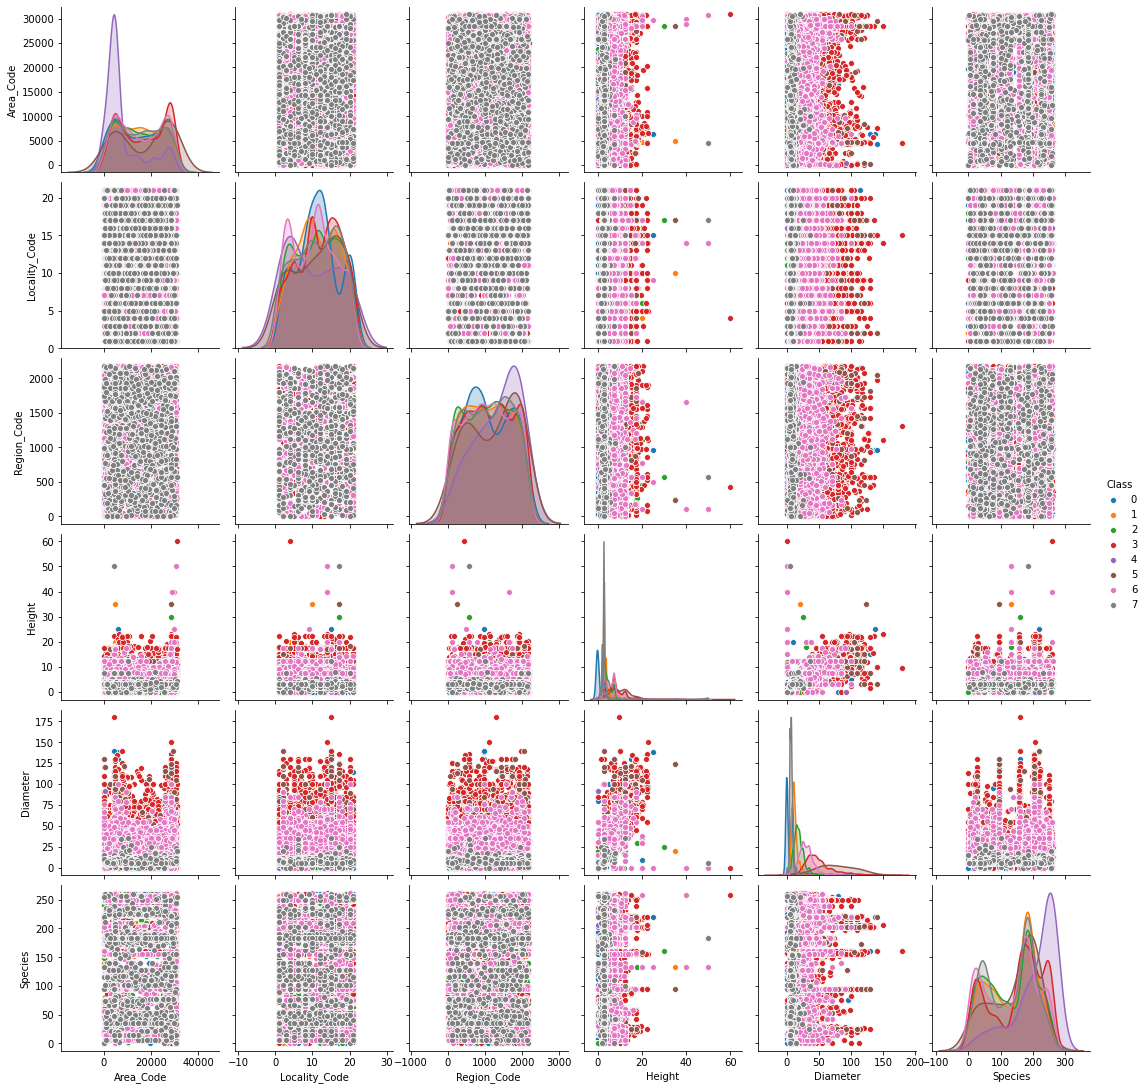

In [21]:
# Let us print the pair plot
sns.pairplot(train,hue='Class')

In [8]:
# checking whether no of labels in each category of species
print(train['Class'].value_counts())

3    3730
6    3425
2    2473
1    1112
7    1092
0     710
5      70
4      54
Name: Class, dtype: int64


In [9]:
train.columns

Index(['Area_Code', 'Locality_Code', 'Region_Code', 'Height', 'Diameter',
       'Class', 'Species'],
      dtype='object')

In [12]:
for val in train.columns:
    print(val,end=' ')
    print(len(train[val].unique()))

Area_Code 10122
Locality_Code 21
Region_Code 1870
Height 92
Diameter 132
Class 8
Species 222


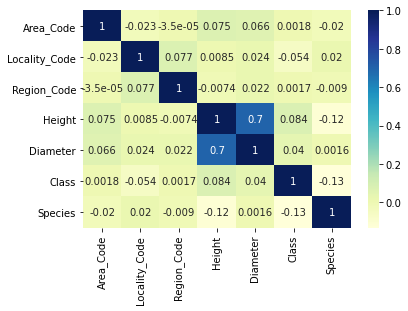

In [14]:
# Finding the correlation betweeen the features

sns.heatmap(train.corr(),cmap="YlGnBu",annot=True)

In [15]:
train['Locality_Code'].unique()

array([17,  7,  6, 19, 11,  8,  9, 13,  1,  2, 15,  3, 12,  5, 18, 21, 16,
       10, 20, 14,  4], dtype=int64)

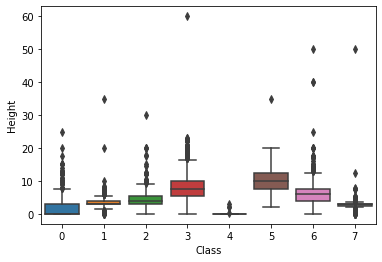

In [17]:
# Let us find how the class varies based on the height and diameter

sns.boxplot(x=train['Class'],y=train['Height'])

### There are so many outliers in the dataset but still lets make this as checkpoint so that we can come here and rectify it if we have to increase the accuracy
### So if we use logistic regression then it would be very difficult to get acceptable accuracy or min log loss

In [19]:
train.shape

(12666, 7)

In [23]:
X = train.drop('Class',axis=1,inplace=False)
y = train['Class']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver="newton-cg",multi_class="multinomial")
log.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [39]:
from sklearn.metrics import log_loss

y_pred = log.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.73      0.64       155
           1       0.00      0.17      0.01         6
           2       0.57      0.45      0.50       942
           3       0.75      0.70      0.73      1192
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.55      0.52      0.53      1098
           7       0.67      0.55      0.61       402

    accuracy                           0.57      3800
   macro avg       0.39      0.39      0.38      3800
weighted avg       0.63      0.57      0.60      3800



In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dtc.predict_proba(X_test)
print(log_loss(y_test,y_pred))

14.427179619174414


In [53]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier()
dtc.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred = dtc.predict_proba(X_test)
print(log_loss(y_test,y_pred))

1.0453018548181978


In [61]:
cols = ['Class_0', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5',
       'Class_6', 'Class_7']

In [57]:
prediction = dtc.predict_proba(test)

In [62]:
submission = pd.DataFrame(data=prediction,columns=cols)
submission.head()

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0.01,0.00,0.346667,0.02,0.0,0.00,0.623333,0.00
1,0.00,0.07,0.000000,0.00,0.0,0.00,0.040000,0.89
2,0.00,0.00,0.030000,0.82,0.0,0.01,0.140000,0.00
3,0.03,0.07,0.010000,0.00,0.0,0.00,0.000000,0.89
4,0.00,0.00,0.410000,0.01,0.0,0.00,0.580000,0.00


In [63]:
submission.to_csv("Sub-randomforest.csv",index=False)

In [74]:
from lightgbm import LGBMClassifier
dtc = LGBMClassifier()
dtc.fit(X_train,y_train)

y_pred = dtc.predict_proba(X_test)
print(log_loss(y_test,y_pred))

0.8380480407713274


In [81]:
prediction = dtc.predict_proba(test)
submission = pd.DataFrame(data=prediction,columns=cols)
submission.to_csv("Sub-lgbm.csv",index=False)
submission.head()

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0.003198,0.020585,0.352566,0.032091,0.000028,0.000031,0.582675,0.008825
1,0.007286,0.065122,0.024461,0.011256,0.000377,0.000022,0.010131,0.881345
2,0.000664,0.000399,0.007484,0.874420,0.000015,0.000613,0.115971,0.000433
3,0.006249,0.035157,0.017511,0.002573,0.000011,0.000010,0.002753,0.935735
4,0.001382,0.025732,0.445255,0.040499,0.000028,0.000031,0.485954,0.001119


In [72]:
from xgboost import XGBClassifier

dtc = XGBClassifier()
dtc.fit(X_train,y_train)

y_pred = dtc.predict_proba(X_test)
print(log_loss(y_test,y_pred))

0.8462129675741782


In [73]:
prediction = dtc.predict_proba(test)
submission = pd.DataFrame(data=prediction,columns=cols)
submission.to_csv("Sub-xgb.csv",index=False)
submission.head()

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0.000699,0.016888,0.371702,0.018175,0.000145,0.000014,0.588164,0.004213
1,0.003590,0.073037,0.014637,0.010771,0.000287,0.000142,0.017179,0.880356
2,0.000244,0.000155,0.002586,0.969338,0.000008,0.000812,0.026646,0.000210
3,0.001145,0.040500,0.005950,0.000581,0.000014,0.000010,0.000678,0.951123
4,0.000212,0.028232,0.311222,0.021652,0.000012,0.000007,0.637967,0.000698


In [84]:
from catboost import CatBoostClassifier
dtc = CatBoostClassifier(verbose=False)
dtc.fit(X_train,y_train)

y_pred = dtc.predict_proba(X_test)
print(log_loss(y_test,y_pred))

0.8370366436614499


In [85]:
prediction = dtc.predict_proba(test)
submission = pd.DataFrame(data=prediction,columns=cols)
submission.to_csv("Sub-catboost.csv",index=False)
submission.head()

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0.000985,0.004910,0.327354,0.008325,0.000044,0.000030,0.656670,0.001681
1,0.027664,0.097030,0.041242,0.016123,0.001007,0.000541,0.039409,0.776983
2,0.000490,0.000120,0.007640,0.837278,0.000010,0.017523,0.136727,0.000214
3,0.006272,0.064297,0.007375,0.000875,0.000244,0.000506,0.001764,0.918668
4,0.000348,0.007775,0.303705,0.028455,0.000005,0.000018,0.659245,0.000448
